# Snowdrift Game

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint

In [2]:
import evol_dynamics

In [3]:
import itertools

In [4]:
import opt_mo

**Nash equilibriums**

In [5]:
c = 1.5
b = 3

In [6]:
A = np.array([[b - (c / 2), b - c], [b, 0]])

In [7]:
A

array([[2.25, 1.5 ],
       [3.  , 0.  ]])

In [8]:
import nashpy as nash

In [9]:
game = nash.Game(A, A.transpose())
list(game.support_enumeration())

[(array([1., 0.]), array([0., 1.])),
 (array([0., 1.]), array([1., 0.])),
 (array([0.66666667, 0.33333333]), array([0.66666667, 0.33333333]))]

In [10]:
def r(b, c):
    return c / (2 * b - c)

In [11]:
1 - r(b,c)

0.6666666666666667

**Replicator dynamics**

In [12]:
t = np.linspace(0, 10, 100000)  # Obtain 100 time points

In [13]:
def dx(x, t, A):
    """
    Define the derivate of x.
    """
    f = np.dot(A, x)
    phi = np.dot(f, x)
    return x * (f - phi)

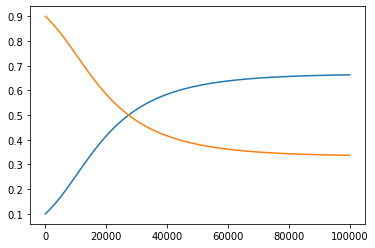

In [14]:
epsilon = 10 ** -1
xs = odeint(func=dx,
            y0=[.1, .9],
            t=t, args=(A,))
plt.plot(xs,);

In [15]:
import pandas as pd
import matplotlib

In [16]:
cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds")]

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [170]:
Ss = [2, 1.6, 1.2, 0.8, 0.4]

In [171]:
points_p = []
points_q = []

for S in Ss:
    df = pd.read_csv(f'matlab/data/expected/clean_S_{S}_T_2.6_stochastic_0.csv')
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

In [64]:
ps, qs = [], []
for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
    for _ in range(int(v)):
        ps.append(p)
        qs.append(q)

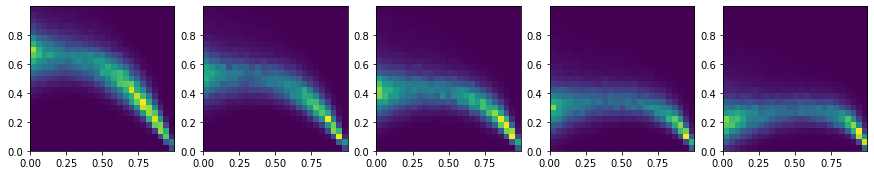

In [173]:
fig, axes = plt.subplots(ncols=5, figsize=(15, 5))

for i, points in enumerate(zip(points_p, points_q)):

    heatmap, xedges, yedges = np.histogram2d(points[0], points[1], bins=25)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[i].imshow(heatmap.T, extent=extent, origin="lower")



In [190]:
import tqdm

In [174]:
ps = np.linspace(0, 1, 100)
qs = np.linspace(0, 1, 100)

In [187]:
opponents = [(0, 0, 0, 0), (1, 0, 1, 0), (1, 1, 1, 1), (0, 1, 0, 1)]

In [188]:
p, q = sym.symbols("p, q")

In [189]:
payoffs = [[1, S, 2.6, 0] for S in Ss]

In [191]:
payoff_matrices = []

for payoff in tqdm.tqdm_notebook(payoffs):
    function = opt_mo.utility.tournament_utility((p, q, p, q), opponents, payoff).simplify()
    
    matrix = np.zeros((100, 100))

    for i, p_val in enumerate(ps):
        for j, q_val in enumerate(qs):

            matrix[i, j] = function.expand().subs({p:p_val, q:q_val})
            
    payoff_matrices.append(matrix)

/Users/glynatsi/opt/anaconda3/envs/stochastic-payoffs/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [193]:
import matplotlib.colors as colors

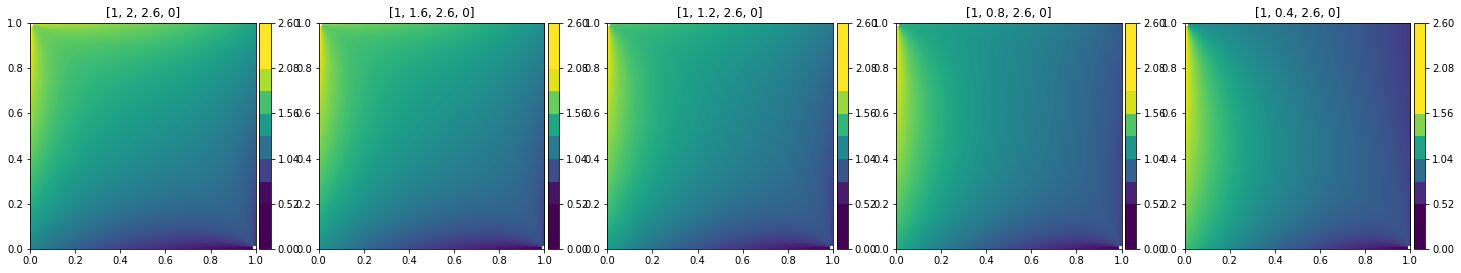

In [245]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 5))

for i, matrix in enumerate(payoff_matrices):
    
    im = axes[i].imshow(matrix.T,
                    extent=(ps[0], ps[-1], qs[0], qs[-1]),

                    origin='lower')

    axes[i].set_title(payoffs[i])
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical', boundaries=np.linspace(0, 2.6, 11))

    

In [147]:
payoff_matrices = []

for opponent in opponents:
    payoff_function = opt_mo.utility.match_utility((p, q, p, q), opponent, payoffs).simplify()
    
    payoffs_against_opponents = np.zeros((100, 100))

    for i, p_val in enumerate(ps):
        for j, q_val in enumerate(qs):

            payoffs_against_opponents[i, j] = payoff_function.expand().subs({p:p_val, q:q_val})
            
    payoff_matrices.append(payoffs_against_opponents)

In [148]:
len(payoff_matrices)

5

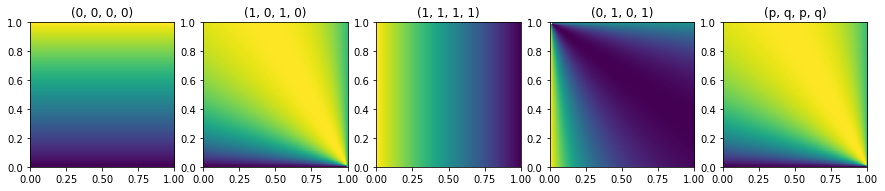

In [165]:
fig, axes = plt.subplots(ncols=5, figsize=(15, 5))

for i, matrix in enumerate(payoff_matrices):
    
    axes[i].imshow(matrix.T,
                    extent=(ps[0], ps[-1], qs[0], qs[-1]),
                    origin='lower')

    axes[i].set_title(opponents[i])
    

In [166]:
function = opt_mo.utility.tournament_utility((p, q, p, q), opponents, payoffs).simplify()

In [167]:
payoffs_ = np.zeros((100, 100))

for i, p_val in enumerate(ps):
    for j, q_val in enumerate(qs):

        payoffs_[i, j] = function.expand().subs({p:p_val, q:q_val})

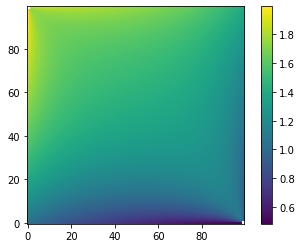

In [169]:
plt.imshow(payoffs_.T,  origin='lower')

plt.colorbar();